<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 1: Importing Libraries </h3></center>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 2: Data Exploration</h3></center>

In [99]:
heart = pd.read_csv("D:/Nour/Semester 7/Data Science/heart_health.csv")
heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
heart.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
heart.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [100]:
heart.age = heart.age/365
heart.age

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

In [152]:
X = heart.iloc[:,:-1]
y = heart.iloc[:,-1]

In [117]:
X.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0


In [118]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 3: Univariate & Multivariate Outlier Detection </h3></center>

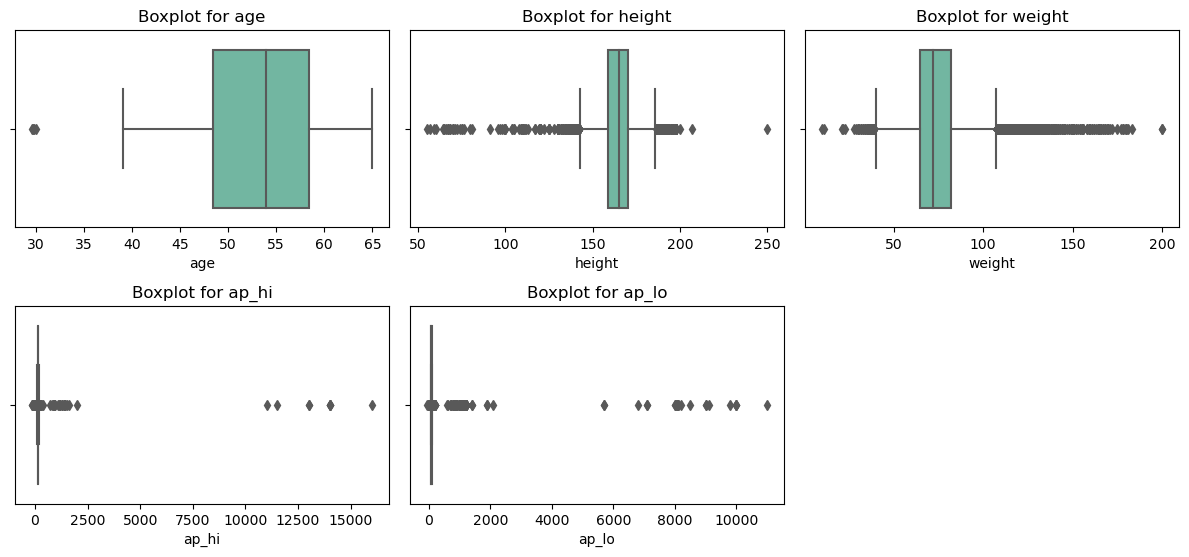

In [240]:
# Univariate Outlier detection using boxplot for each quantitative variable
data= X[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
plt.figure(figsize=(12, 8))

for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=data[column], palette='Set2')
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [133]:
# Multivariate Outlier Detection using Isolation Forest
from sklearn.ensemble import IsolationForest
IF = IsolationForest(contamination=0.05)  

IF.fit(X)
outliers = IF.predict(X)
if_index  = np.where(outliers == -1)[0]

print("Outliers index:", if_index)
len(if_index)

Outliers index: [   14    29    62 ... 69953 69970 69997]


3500

In [139]:
# Multivariate Outlier Detection using DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standata = scaler.fit_transform(X)
dbscan = DBSCAN(eps=1, min_samples=3)
outliers2 = dbscan.fit(standata)
dbscan_index = np.where(outliers2.labels_ == -1)[0]
len(dbscan_index)

2740

In [141]:
# Getting common outliers between both methods
common_outliers = np.intersect1d(dbscan_index, if_index)
# Checking the proportion over the data to remove them without affecting the data
len(common_outliers)/len(y)

0.023428571428571427

In [154]:
# Removing the common outliers
labels = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X_without_outliers = np.delete(X, common_outliers, axis=0)
X_without_outliers = DataFrame(X_without_outliers, columns = labels)
X_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.0,50.391781,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0
1,1.0,55.419178,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0
2,2.0,51.663014,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0
3,3.0,48.282192,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0
4,4.0,47.873973,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68355,99992.0,57.736986,1.0,165.0,80.0,150.0,80.0,1.0,1.0,0.0,0.0,1.0
68356,99993.0,52.712329,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0
68357,99995.0,61.920548,1.0,158.0,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0
68358,99998.0,61.454795,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0


<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 4: Data Visualization </h3></center>

<center> <h4  style="background-color:#2a9d8f; color:white;"> Quantitaive Data </h4></center>

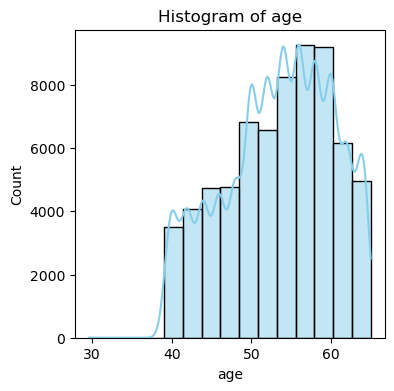

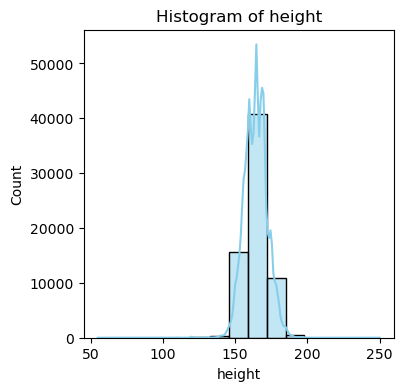

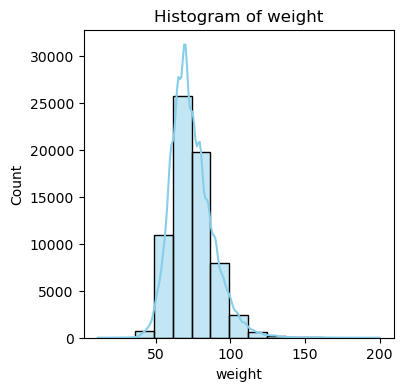

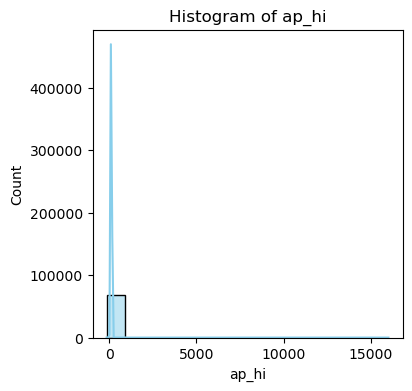

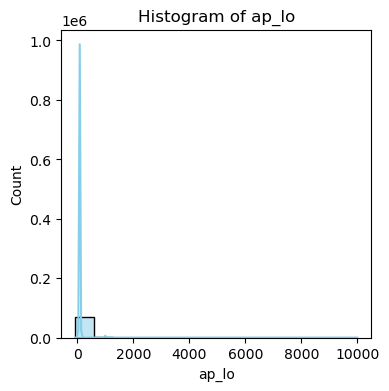

In [158]:
quantitative = X_without_outliers[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
for i, column in enumerate(quantitative.columns, 1):
    plt.figure(figsize=(4,4))
    sns.histplot(quantitative[column],bins = 15, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')

plt.show()

<center> <h4  style="background-color:#2a9d8f; color:white;"> Qualitative Data </h4></center>

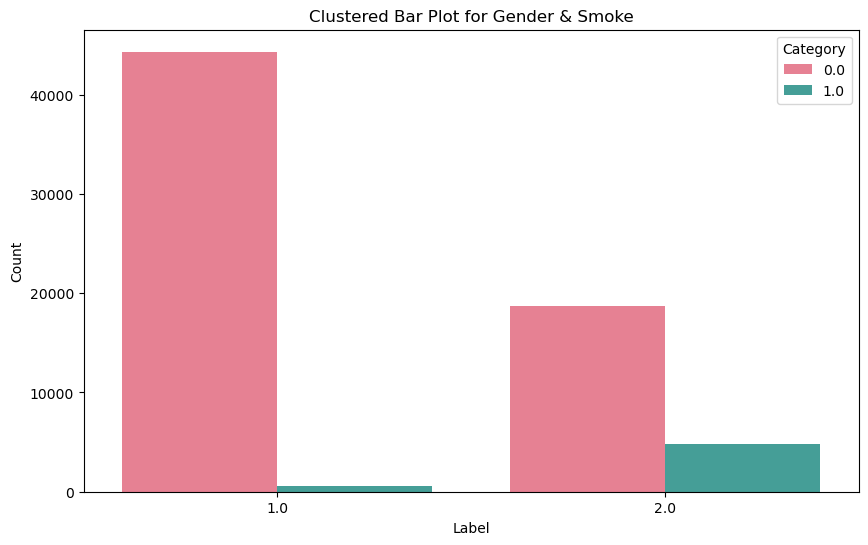

In [241]:
qualitative = X_without_outliers[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
plt.figure(figsize=(10, 6))
sns.countplot(x=qualitative.gender, hue=qualitative.smoke, data=qualitative, palette='husl')
plt.title('Clustered Bar Plot for Gender & Smoke')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

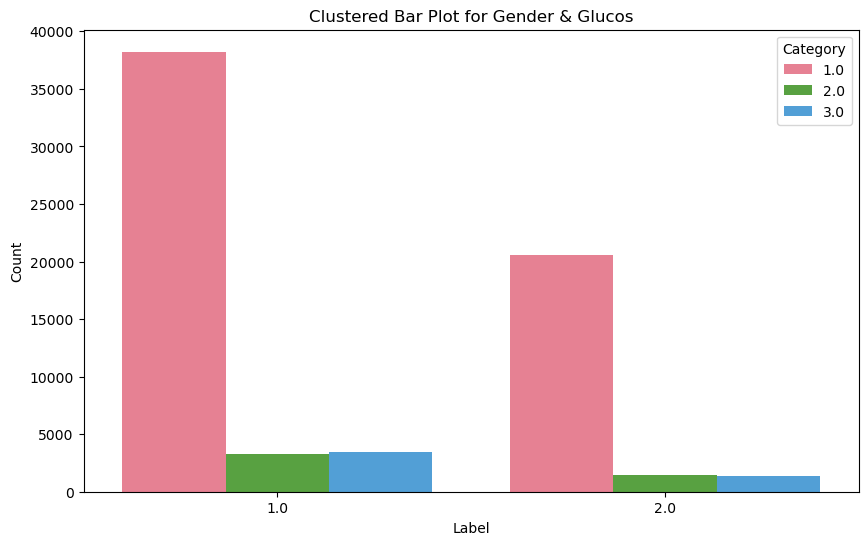

In [250]:
qualitative = X_without_outliers[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
plt.figure(figsize=(10, 6))
sns.countplot(x=qualitative.gender, hue=qualitative.gluc, data=qualitative, palette='husl')
plt.title('Clustered Bar Plot for Gender & Glucos')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

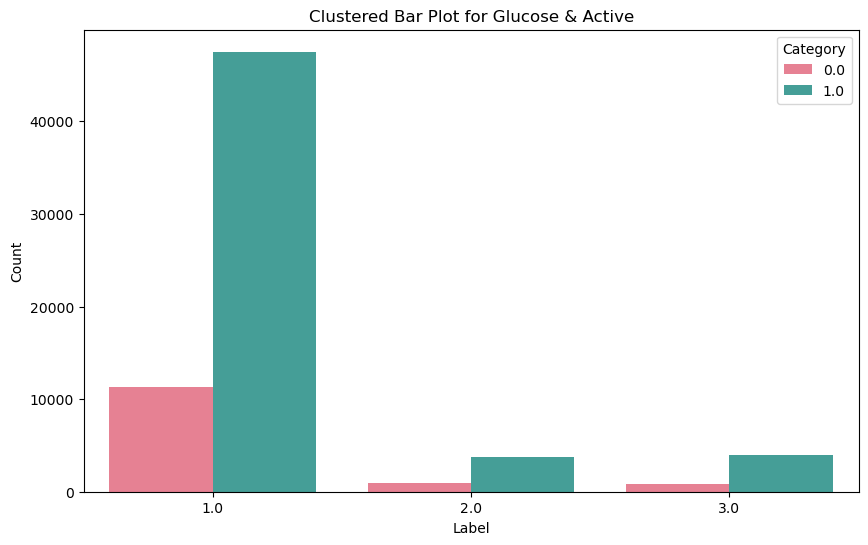

In [249]:
qualitative = X_without_outliers[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
plt.figure(figsize=(10, 6))
sns.countplot(x=qualitative.gluc, hue=qualitative.active, data=qualitative, palette='husl')
plt.title('Clustered Bar Plot for Glucose & Active')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

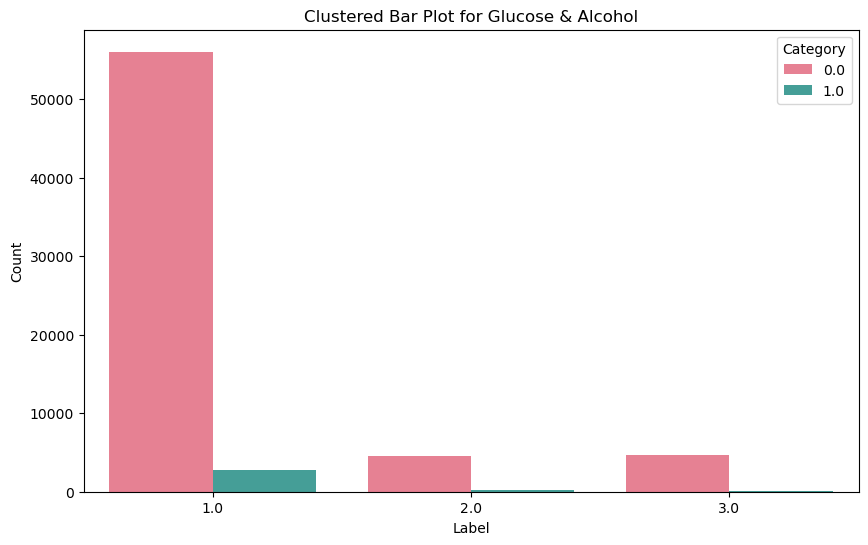

In [251]:
qualitative = X_without_outliers[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
plt.figure(figsize=(10, 6))
sns.countplot(x=qualitative.gluc, hue=qualitative.alco, data=qualitative, palette='husl')
plt.title('Clustered Bar Plot for Glucose & Alcohol')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

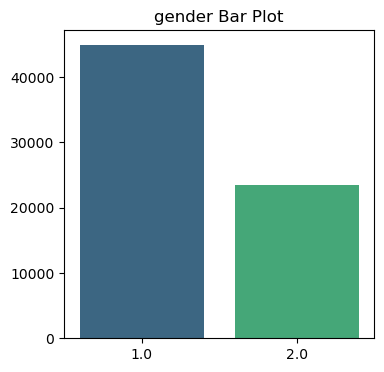

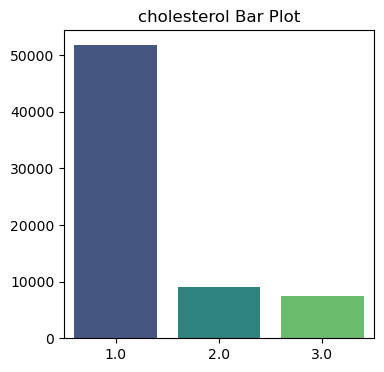

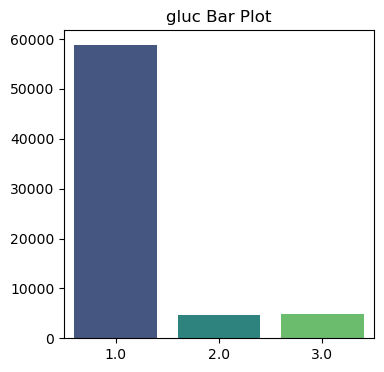

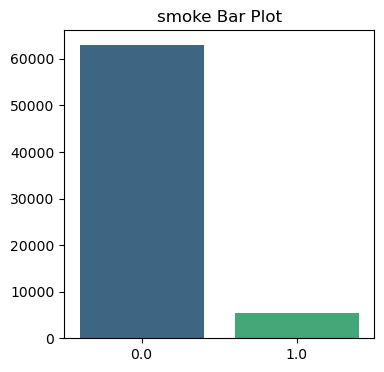

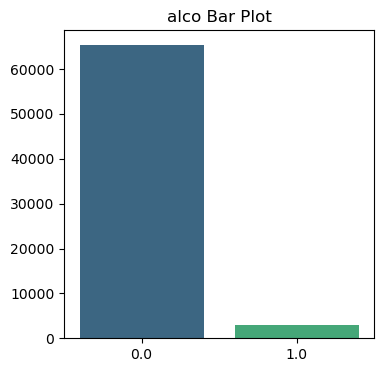

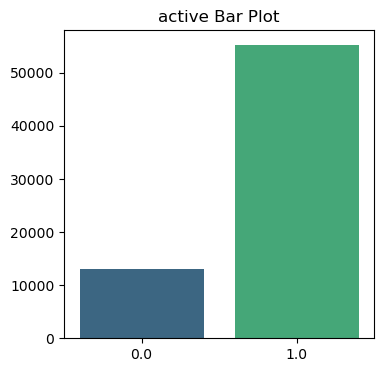

In [167]:
for i, column in enumerate(qualitative.columns, 1):
    plt.figure(figsize=(4,4))
    var, count = np.unique(qualitative[column], return_counts=True)
    sns.barplot(x=var, y=count, errorbar=None, palette='viridis')
    plt.title(f'{column} Bar Plot')
    plt.show()

plt.show()

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 5: Feature Scaling </h3></center>

<Axes: xlabel='height', ylabel='weight'>

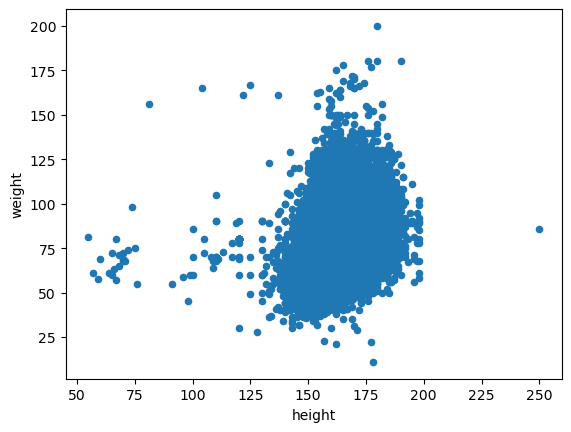

In [170]:
scat = X_without_outliers[['height', 'weight']]
scat.plot.scatter(x = 'height', y = 'weight')

In [168]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_without_outliers)
X_norm = DataFrame(X_norm, columns =labels)
X_norm

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-1.735015,-0.438296,1.383751,0.460486,-0.850785,-0.118952,-0.070225,-0.525582,-0.379302,-0.291831,-0.214279,0.487119
1,-1.734980,0.307068,-0.722674,-1.023401,0.799211,0.073737,-0.002810,2.467859,-0.379302,-0.291831,-0.214279,0.487119
2,-1.734946,-0.249822,-0.722674,0.089514,-0.707307,0.009507,-0.137640,2.467859,-0.379302,-0.291831,-0.214279,-2.052886
3,-1.734911,-0.751064,1.383751,0.584143,0.583994,0.137967,0.064606,-0.525582,-0.379302,-0.291831,-0.214279,0.487119
4,-1.734876,-0.811587,-0.722674,-1.023401,-1.281219,-0.183181,-0.205056,-0.525582,-0.379302,-0.291831,-0.214279,-2.052886
...,...,...,...,...,...,...,...,...,...,...,...,...
68355,1.737133,0.650708,-0.722674,0.089514,0.440516,0.137967,-0.070225,-0.525582,-0.379302,-0.291831,-0.214279,0.487119
68356,1.737168,-0.094250,1.383751,0.460486,0.153560,-0.054722,-0.070225,-0.525582,-0.379302,3.426638,-0.214279,0.487119
68357,1.737237,1.270964,-0.722674,-0.776086,3.740508,0.073737,-0.002810,0.971139,1.424711,-0.291831,-0.214279,0.487119
68358,1.737341,1.201912,-0.722674,-0.157800,-0.133396,0.041622,-0.070225,-0.525582,1.424711,-0.291831,-0.214279,-2.052886


<Axes: xlabel='height', ylabel='weight'>

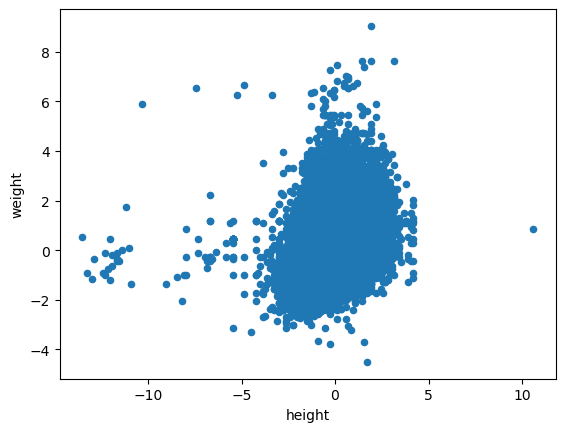

In [169]:
scat = X_norm[['height', 'weight']]
scat.plot.scatter(x = 'height', y = 'weight')

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 6: Feature Selection </h3></center>

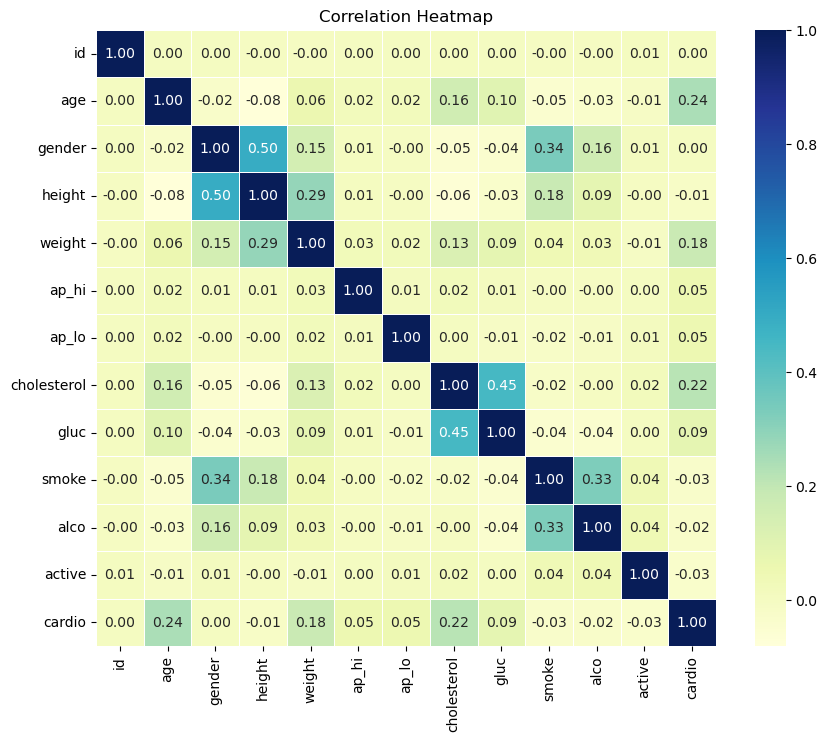

In [173]:
# Setting a threshold of 0.05 for selecting features
import seaborn as sns
y_without_outliers = np.delete(y, common_outliers, axis=0)

data = pd.DataFrame(X_without_outliers, columns=heart.columns[:-1])
data['cardio'] = y_without_outliers
corrmatrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation matrix shows no signs of multicollinearity

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 7: Parameter tuning & Model Training </h3></center>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_without_outliers, y_without_outliers,test_size=0.2,random_state=0)

<center> <h4  style="background-color:#2a9d8f; color:white;"> With Feature Selection </43></center>

In [208]:
data2 = X_without_outliers[['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']]
data2['cardio'] = y_without_outliers
X1= data2.iloc[:,:-1]
y1 = data2.iloc[:,-1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size=0.2,random_state=0)


C:\Users\Nour\AppData\Local\Temp\ipykernel_11820\2812289386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cardio'] = y_without_outliers


In [210]:
# Parameter tuning for XGBoost model
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
estimators = [10, 25, 50, 100, 200]
accuracytest = []
meanse = []
df = DataFrame(columns=['estimators', 'MSE', 'test_acc', 'time'])
k = 0
for i in estimators:

    X_train_temp = X_train1
    y_train_temp = y_train1

    XGB = xgb.XGBClassifier(n_estimators=i, random_state=0)

    XGB.fit(X_train_temp, y_train_temp)
    XGB_start = time.time()
    y_pred = XGB.predict(X_test1)
    XGB_end = time.time()

    XGB_time = XGB_end - XGB_start

    accuracy = accuracy_score(y_test1, y_pred)
    print('Accuracy for #estimators',i,":",accuracy )
    MSE = mean_squared_error(y_test1, y_pred)
    print("MSE for #estimators",i,":", MSE)
    
    accuracytest.append(accuracy)
    meanse.append(MSE)

    df.loc[k] = [i,MSE, accuracy, XGB_time]
    k += 1

Accuracy for #estimators 10 : 0.7312024575775308
MSE for #estimators 10 : 0.2687975424224693
Accuracy for #estimators 25 : 0.7293739028671737
MSE for #estimators 25 : 0.2706260971328262
Accuracy for #estimators 50 : 0.7296664716208309
MSE for #estimators 50 : 0.27033352837916913
Accuracy for #estimators 100 : 0.7295933294324166
MSE for #estimators 100 : 0.2704066705675834
Accuracy for #estimators 200 : 0.7280573434757168
MSE for #estimators 200 : 0.27194265652428323


In [211]:
df

,estimators,MSE,test_acc,time
0,10.0,0.268798,0.731202,0.013962
1,25.0,0.270626,0.729374,0.037001
2,50.0,0.270334,0.729666,0.035344
3,100.0,0.270407,0.729593,0.084511
4,200.0,0.271943,0.728057,0.139091


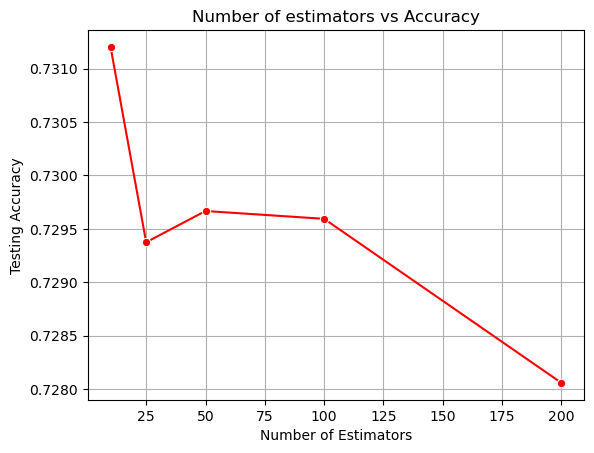

In [212]:
sns.lineplot(x=estimators, y=accuracytest, color = 'red',marker = 'o')
plt.xlabel("Number of Estimators")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("Number of estimators vs Accuracy")
plt.show()

The highest accuracy is where number of estimators is 10, thus we choose it for our model

In [213]:
# Chosen model
XGB = xgb.XGBClassifier(n_estimators=10, random_state=0)

XGB.fit(X_train1, y_train1)
XGB_start = time.time()
y_pred = XGB.predict(X_test1)
XGB_end = time.time()

XGB_time = XGB_end - XGB_start

accuracy = accuracy_score(y_test1, y_pred)
print('Accuracy for #estimators 10:',accuracy )
MSE = mean_squared_error(y_test1, y_pred)
print("MSE for #estimators 10:", MSE)

Accuracy for #estimators 10: 0.7312024575775308
MSE for #estimators 10: 0.2687975424224693


In [214]:
from sklearn import metrics

print(metrics.classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6845
           1       0.76      0.68      0.72      6827

    accuracy                           0.73     13672
   macro avg       0.73      0.73      0.73     13672
weighted avg       0.73      0.73      0.73     13672



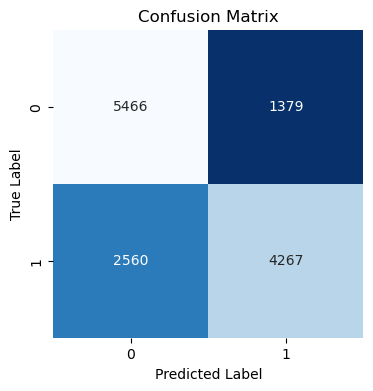

In [253]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test1, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [216]:
# Parameter tuning for Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

C = [0.01, 0.1, 1, 10, 100]
accuracytestlr = []
lrmeanse = []
df1 = DataFrame(columns=['C', 'MSE', 'test_acc', 'time'])
k = 0
for i in C:
    X_train_temp = X_train1
    y_train_temp = y_train1

    LR = LogisticRegression(C=i, max_iter=10000)
    LR.fit(X_train_temp, y_train_temp)
    LR_start = time.time()

    y_predlr = LR.predict(X_test1)
    LR_end = time.time()

    LR_time = LR_end - LR_start

    lraccuracy = accuracy_score(y_test1, y_predlr)
    print(f"Accuracy for C {i}:", lraccuracy)
    lr_MSE = mean_squared_error(y_test1, y_predlr)
    print(f"MSE for C {i}:", lr_MSE)

    
    accuracytestlr.append(lraccuracy)
    lrmeanse.append(lr_MSE)

    df1.loc[k] = [i,lr_MSE, lraccuracy, LR_time]
    k += 1

Accuracy for C 0.01: 0.7140871854885898
MSE for C 0.01: 0.2859128145114102
Accuracy for C 0.1: 0.7140140433001756
MSE for C 0.1: 0.28598595669982446
Accuracy for C 1: 0.7139409011117612
MSE for C 1: 0.2860590988882387
Accuracy for C 10: 0.7139409011117612
MSE for C 10: 0.2860590988882387
Accuracy for C 100: 0.7139409011117612
MSE for C 100: 0.2860590988882387


In [217]:
df1

,C,MSE,test_acc,time
0,0.01,0.285913,0.714087,0.006486
1,0.10,0.285986,0.714014,0.009711
2,1.00,0.286059,0.713941,0.005980
3,10.00,0.286059,0.713941,0.007718
4,100.00,0.286059,0.713941,0.007161


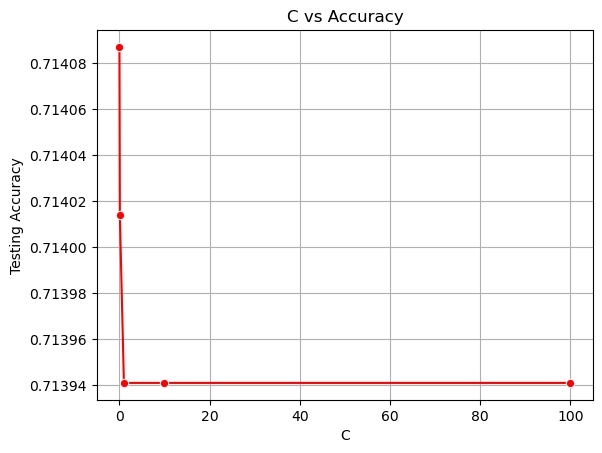

In [218]:
sns.lineplot(x=C, y=accuracytestlr, color = 'red',marker = 'o')
plt.xlabel("C")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("C vs Accuracy")
plt.show()

The highest accuracy is when the regularization parameter is 0.01 

In [219]:
# Chosen Model
LR = LogisticRegression(C=0.01, max_iter=10000)
LR.fit(X_train1, y_train1)
LR_start = time.time()

y_predlr = LR.predict(X_test1)
LR_end = time.time()

LR_time = LR_end - LR_start

lraccuracy = accuracy_score(y_test1, y_predlr)
print(f"Accuracy for C 10:", lraccuracy)
lr_MSE = mean_squared_error(y_test1, y_predlr)
print(f"MSE for C 10:", lr_MSE)

    

Accuracy for C 10: 0.7140871854885898
MSE for C 10: 0.2859128145114102


In [221]:
from sklearn import metrics

print(metrics.classification_report(y_test1, y_predlr))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6845
           1       0.74      0.67      0.70      6827

    accuracy                           0.71     13672
   macro avg       0.72      0.71      0.71     13672
weighted avg       0.72      0.71      0.71     13672



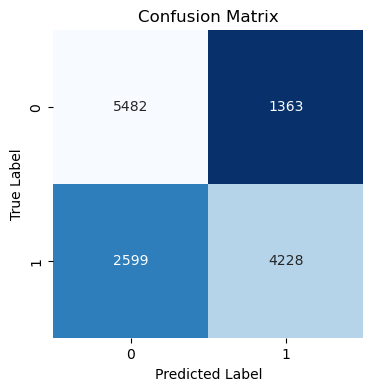

In [254]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test1, y_predlr)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [220]:
# Parameter Tuning for KNN
k_neighbors = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracytestknn = []
knnmeanse = []
df2 = DataFrame(columns=['k', 'MSE', 'test_acc', 'time'])
k = 0
for i in k_neighbors:
    X_train_temp = X_train1
    y_train_temp = y_train1
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train_temp, y_train_temp)

    KNN_start = time.time()
    y_pred2 = KNN.predict(X_test1)
    KNN_end = time.time()

    KNN_time = KNN_end - KNN_start

    knnaccuracy = accuracy_score(y_test1, y_pred2)
    print(f"Accuracy for {i} neighbors: ", knnaccuracy)
    knn_MSE = mean_squared_error(y_test1, y_pred2)
    print(f"MSE for {i} neighbors:", knn_MSE)
    
    accuracytestknn.append(knnaccuracy)
    knnmeanse.append(knn_MSE)

    df2.loc[k] = [i,knn_MSE, knnaccuracy, KNN_time]
    k += 1

Accuracy for 3 neighbors:  0.6701287302516091
MSE for 3 neighbors: 0.32987126974839087
Accuracy for 5 neighbors:  0.6860737273259216
MSE for 5 neighbors: 0.3139262726740784
Accuracy for 7 neighbors:  0.696459918080749
MSE for 7 neighbors: 0.303540081919251
Accuracy for 9 neighbors:  0.7015798712697484
MSE for 9 neighbors: 0.2984201287302516
Accuracy for 11 neighbors:  0.7060415447630193
MSE for 11 neighbors: 0.29395845523698066
Accuracy for 13 neighbors:  0.7105032182562903
MSE for 13 neighbors: 0.2894967817437098
Accuracy for 15 neighbors:  0.7115272088940902
MSE for 15 neighbors: 0.2884727911059099
Accuracy for 17 neighbors:  0.7123317729666472
MSE for 17 neighbors: 0.2876682270333528
Accuracy for 19 neighbors:  0.7149648917495611
MSE for 19 neighbors: 0.2850351082504389
Accuracy for 21 neighbors:  0.7159157401989468
MSE for 21 neighbors: 0.28408425980105323


In [223]:
df

,estimators,MSE,test_acc,time
0,10.0,0.268798,0.731202,0.013962
1,25.0,0.270626,0.729374,0.037001
2,50.0,0.270334,0.729666,0.035344
3,100.0,0.270407,0.729593,0.084511
4,200.0,0.271943,0.728057,0.139091


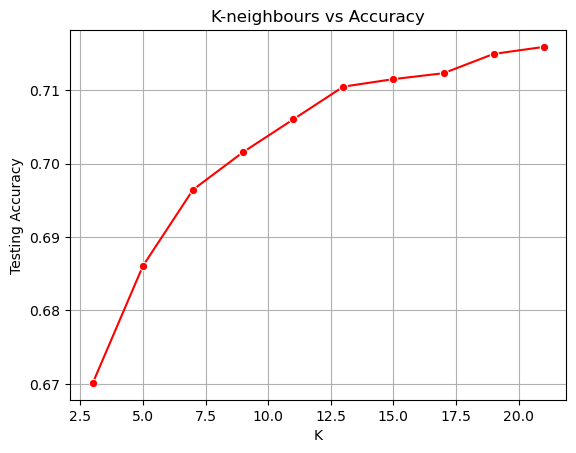

In [224]:
sns.lineplot(x=k_neighbors, y=accuracytestknn, color = 'red',marker = 'o')
plt.xlabel("K")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("K-neighbours vs Accuracy")
plt.show()

The highest accuracy is at k = 21

In [225]:
# Chosen Model

KNN = KNeighborsClassifier(n_neighbors=21)
KNN.fit(X_train1, y_train1)

KNN_start = time.time()
y_predknn = KNN.predict(X_test1)
KNN_end = time.time()

KNN_time = KNN_end - KNN_start

knnaccuracy = accuracy_score(y_test1, y_predknn)
print(f"Accuracy for 21 nearest neighbors: ", knnaccuracy)
knn_MSE = mean_squared_error(y_test1, y_predknn)
print(f"MSE for 21 nearest neighbors:", knn_MSE)
    

Accuracy for 21 nearest neighbors:  0.7159157401989468
MSE for 21 nearest neighbors: 0.28408425980105323


In [226]:
print(metrics.classification_report(y_test1, y_predknn))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6845
           1       0.74      0.67      0.70      6827

    accuracy                           0.72     13672
   macro avg       0.72      0.72      0.72     13672
weighted avg       0.72      0.72      0.72     13672



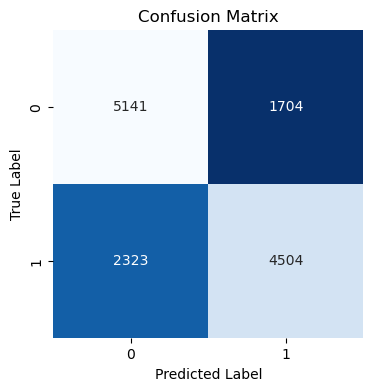

In [255]:
conf_matrix = confusion_matrix(y_test1, y_predknn)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<center> <h4  style="background-color:#2a9d8f; color:white;"> With PCA </h4></center>

Text(0, 0.5, 'Cumulative Explained Variance')

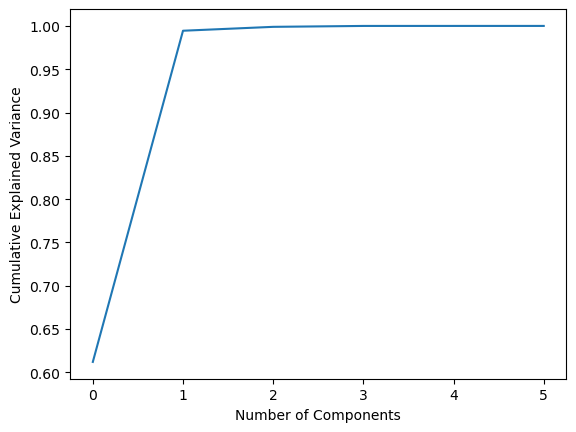

In [244]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [245]:
pca = PCA(n_components=2)
pca.fit(X_train1)
X_trainpca = pca.transform(X_train1)
X_testpca = pca.transform(X_test1)

In [248]:
XGB = xgb.XGBClassifier(n_estimators=10, random_state=0)

XGB.fit(X_trainpca, y_train1)
XGB_start = time.time()
y_pred = XGB.predict(X_testpca)
XGB_end = time.time()

XGB_time = XGB_end - XGB_start

accuracy1 = accuracy_score(y_test1, y_pred)
print('Accuracy for #estimators 10:',accuracy1 )
MSE1 = mean_squared_error(y_test1, y_pred)
print("MSE for #estimators 10:", MSE1)

Accuracy for #estimators 10: 0.7118929198361615
MSE for #estimators 10: 0.2881070801638385


In [247]:
LR = LogisticRegression(C=0.01, max_iter=10000)
LR.fit(X_trainpca, y_train1)
LR_start = time.time()

y_predlr = LR.predict(X_testpca)
LR_end = time.time()

LR_time = LR_end - LR_start

lraccuracy1 = accuracy_score(y_test1, y_predlr)
print(f"Accuracy for C 10:", lraccuracy1)
lr_MSE1 = mean_squared_error(y_test1, y_predlr)
print(f"MSE for C 10:", lr_MSE1)

Accuracy for C 10: 0.7102106495026331
MSE for C 10: 0.28978935049736687


In [246]:

KNN = KNeighborsClassifier(n_neighbors=21)
KNN.fit(X_trainpca, y_train1)

KNN_start = time.time()
y_predknn = KNN.predict(X_testpca)
KNN_end = time.time()

KNN_time = KNN_end - KNN_start

knnaccuracy1 = accuracy_score(y_test1, y_predknn)
print(f"Accuracy for 21 nearest neighbors: ", knnaccuracy1)
knn_MSE1 = mean_squared_error(y_test1, y_predknn)
print(f"MSE for 21 nearest neighbors:", knn_MSE1)

Accuracy for 21 nearest neighbors:  0.7054564072557051
MSE for 21 nearest neighbors: 0.2945435927442949


Since all models have lower performance after PCA, we will use the original data since we are not facing any issues with computational time

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 8: Model Comparison </h3></center>

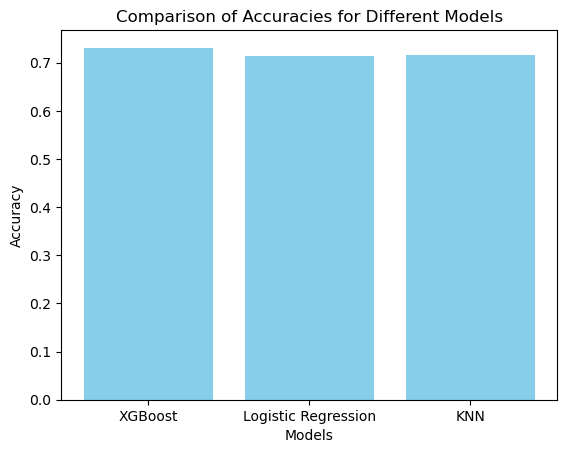

In [234]:
# Note that the higher accuracy the better
accuracies = [accuracy, lraccuracy, knnaccuracy]
model_names = ['XGBoost', 'Logistic Regression', 'KNN']
plt.bar(model_names, accuracies,  color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies for Different Models')
plt.show
plt.ylim = (0.5, 1.0)

While all 3 models have similar performances, XGBoost has the highest accuracy followed by KNN followed by logistic regression

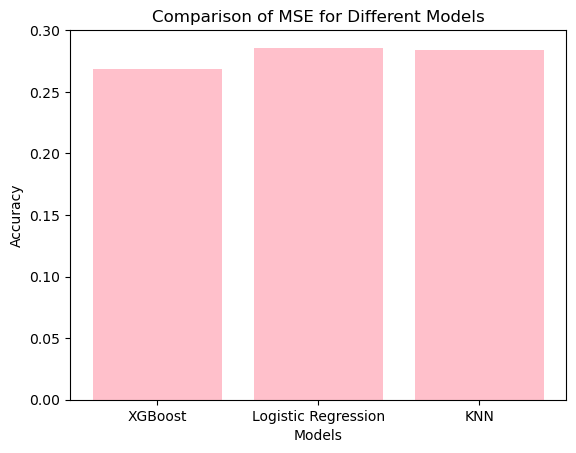

In [243]:
# Note that the lower the MSE the better
accuracies = [MSE, lr_MSE, knn_MSE]
model_names = ['XGBoost', 'Logistic Regression', 'KNN']
plt.bar(model_names, accuracies,  color = 'pink')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of MSE for Different Models')
plt.show()

As expected, the MSE is the opposite of the accuracy. XGBoost being the lowest, then KNN then Logistic Regression. In both performance metrics XGBoost performs the best. XGBoost > KNN > Logistic Regression